
## Author : Indumathi Pandiyan

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">**Computer Vision Project** (Module 2) submitted for PGP-AIML Great Learning on 29-May-2022

## PART A - 20 Marks

**DOMAIN**: Entertainment <br>
**CONTEXT**:Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene. <br>
The data labelling is already done. 

• **DATA DESCRIPTION**:The dataset comprises of images and its mask for corresponding human face. <br>
**• PROJECT OBJECTIVE:** : To build a face detection system

## Steps and tasks: [ Total Score: 20 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.Import and Understand the data [7 Marks]

### Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import collections
import seaborn as sns
import pandas as pd

from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

# Import label encoder
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import Dropout, InputLayer, BatchNormalization
from tensorflow.keras import layers

import cv2
import glob
import os


In [2]:
# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Import and read ‘images.npy. [1 Mark]
   

In [3]:
#.npy is the extension of numpy array .
# numpy.load to be used to read the numpy array

image_array= np.load('images.npy',allow_pickle=True)


In [104]:
image_array[0][0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

### Checking the images in each items of the array to understand the Data

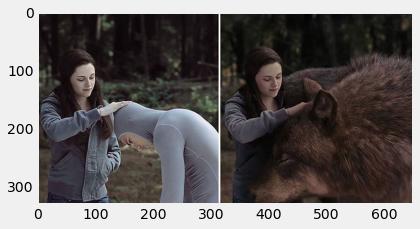

In [5]:
plt.imshow(image_array[0][0])
plt.grid(False)

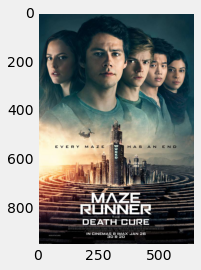

In [6]:
plt.imshow(image_array[11][0])
plt.grid(False)

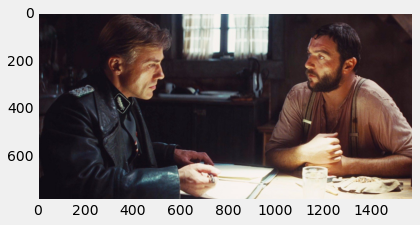

In [62]:
plt.imshow(image_array[255][0])
plt.grid(False)

In [64]:
image_array.shape

(409, 2)

**Observation**: The image array has 409 images and the array is 2 dimensional

### Understanding and checking how the face mask co-ordinates are stored in the given numpy array

In [66]:
image_array[0][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

In [68]:
face_list = image_array[239][1]
for i in range(len(face_list)):
    print(('--'*26))
    print(face_list[i])
    face_arr=face_list[i]
    print(face_arr.get('label'))
    print(face_arr.get('points'))
    points=face_arr.get('points')
    print('length of points',len(points))
    for j in range(len(points)):
        print('point details',points[j])
    imageWidth=face_arr.get('imageWidth')
    imageHeight=face_arr.get('imageHeight')
    print('imageWidth',imageWidth)
    print('imageHeight',imageHeight)

----------------------------------------------------
{'label': ['Face'], 'notes': '', 'points': [{'x': 0.25833333333333336, 'y': 0.25}, {'x': 0.5479166666666667, 'y': 0.6611111111111111}], 'imageWidth': 480, 'imageHeight': 360}
['Face']
[{'x': 0.25833333333333336, 'y': 0.25}, {'x': 0.5479166666666667, 'y': 0.6611111111111111}]
length of points 2
point details {'x': 0.25833333333333336, 'y': 0.25}
point details {'x': 0.5479166666666667, 'y': 0.6611111111111111}
imageWidth 480
imageHeight 360


**Observation**: The first Dimension has the image details in array and second dimension has meta data about face mask information

### For understanding the data printing the random images

In [8]:
## Method to display random images
def display_random_images(no_of_images,im_array,title_name):## accept number of random images as input, data frame and name of title column
    randomlist = random.sample(range(0, im_array.shape[0]), no_of_images)
    print(randomlist)
    w = 10
    h = 10
    fig = plt.figure(figsize=(15, 15))
    
    columns = 3
    ## Logic to find the number of grids to represent
    num_rows=no_of_images//columns # Quotient will be stored in num_rows
    reminder=no_of_images%columns  # Reminder will be stored in Reminder
    
    if(reminder==0):
        rows=num_rows
    else:
        rows=num_rows+1
    #rows =2
    x=0
    for i in randomlist:
        x=x+1
        fig.add_subplot(rows, columns, x)
        fig.add_subplot(rows, columns, x)
        #species_name=data.iloc[i][title_name]
        plt.title(i)
        #img=seedling_df.iloc[i]['actual_img']
        plt.grid(False)
        plt.imshow(image_array[i][0])
    plt.show()

[389, 233, 189, 206, 176, 323, 218, 201, 365]


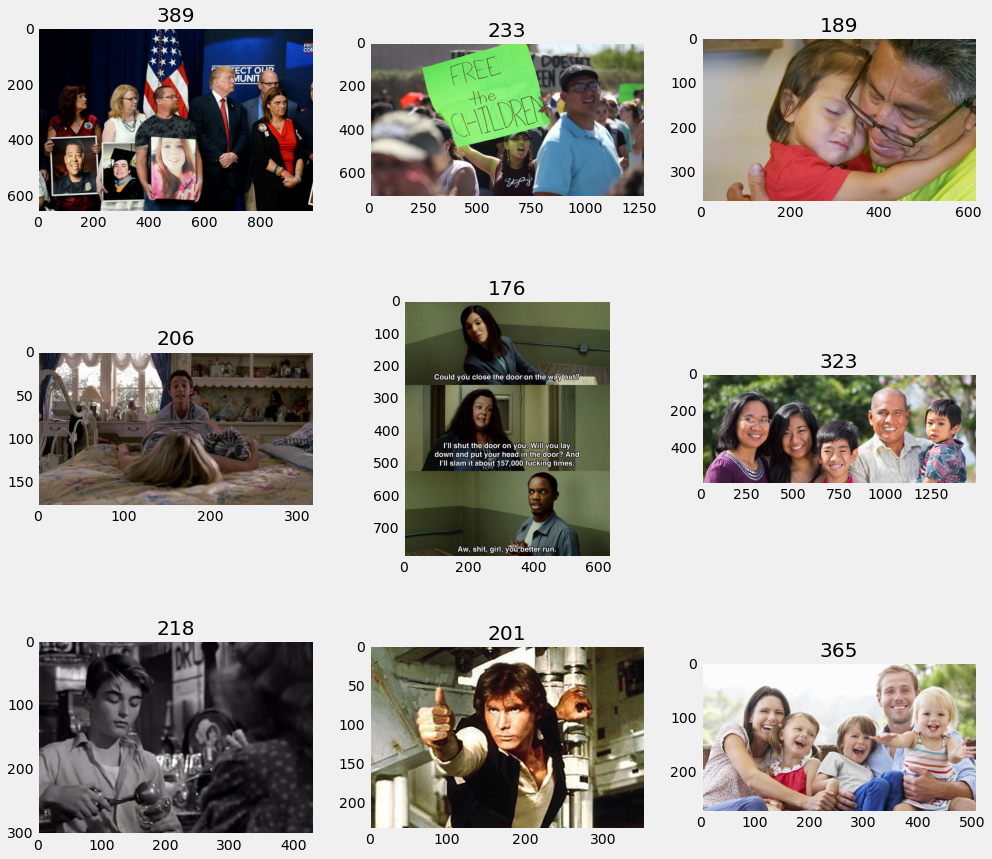

In [105]:
import random
display_random_images(9,image_array,'images')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Split the data into Features(X) & labels(Y). Unify shape of all the images. [3 Marks]

### Set image dimension

In [11]:
ALPHA = 1
IMAGE_SIZE = 224
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [12]:

# Create features and labels
from tensorflow.keras.applications.mobilenet import preprocess_input

In [13]:
y = np.zeros((int(image_array.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(image_array.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

for index in range(image_array.shape[0]):
    img = image_array[index][0]
    img = cv2.resize(img, dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype = np.float32))
    for i in image_array[index][1]:
        x1 = int(i['points'][0]['x'] * IMAGE_WIDTH)
        x2 = int(i['points'][1]['x'] * IMAGE_WIDTH)
        y1 = int(i['points'][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i['points'][1]['y'] * IMAGE_HEIGHT)
        y[index][y1:y2, x1:x2] = 1

In [14]:
X.shape

(409, 224, 224, 3)

In [15]:
y.shape

(409, 224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


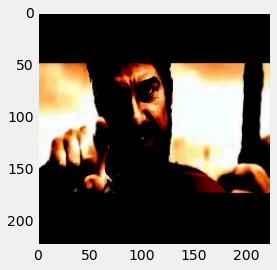

In [71]:
plt.imshow(X[239])
plt.grid(False)

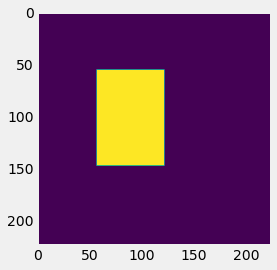

In [91]:
plt.imshow(y[239])
plt.grid(False)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">C. Split the data into train and test[400:9]. [1 Marks]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state = 40, shuffle = False)

In [18]:
X_train.shape

(400, 224, 224, 3)

In [19]:
X_test.shape

(9, 224, 224, 3)

In [20]:
y_train.shape

(400, 224, 224)

In [21]:
y_test.shape

(9, 224, 224)

In [22]:
image_array.size

818

In [23]:
image_array.shape

(409, 2)

In [39]:
image_array[0]

array([array([[[42, 37, 34],
               [56, 51, 48],
               [71, 66, 63],
               ...,
               [23, 33, 34],
               [26, 36, 37],
               [28, 38, 39]],

              [[40, 35, 32],
               [51, 46, 43],
               [64, 59, 56],
               ...,
               [27, 36, 35],
               [24, 33, 32],
               [26, 35, 34]],

              [[43, 38, 35],
               [51, 46, 43],
               [61, 56, 53],
               ...,
               [28, 30, 27],
               [33, 35, 32],
               [35, 37, 34]],

              ...,

              [[56, 47, 40],
               [57, 48, 41],
               [61, 52, 45],
               ...,
               [67, 48, 42],
               [55, 35, 28],
               [60, 40, 33]],

              [[53, 44, 37],
               [54, 45, 38],
               [57, 48, 41],
               ...,
               [59, 40, 34],
               [60, 40, 33],
               [54, 34, 27]],



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">D. Select random image from the train data and display original image and masked image. [2 Marks]

In [24]:
X_train.shape[0]

400

In [25]:
n=random.randint(0,X_train.shape[0])

In [26]:
n

86

### Original Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


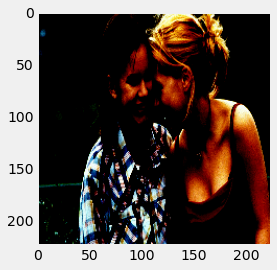

In [27]:

plt.imshow(X_train[n])
plt.grid(False)

### Masked Image

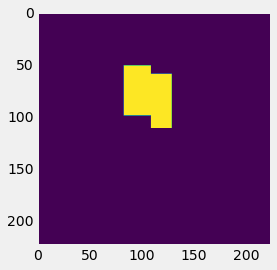

In [28]:

plt.imshow(y_train[n])
plt.grid(False)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.Model building [11 Marks]

Hint: 1. Use MobileNet architecture for initial pre-trained non-trainable layers.<br>
Hint: 2. Add appropriate Upsampling layers to imitate U-net architecture.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A.Design a face mask detection model. [4 Marks]

In [29]:
ALPHA = 1
IMAGE_SIZE = 224
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [30]:
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, Activation, BatchNormalization, SpatialDropout2D

In [31]:
from tensorflow.keras.applications.mobilenet import MobileNet

In [73]:
from tensorflow.keras.models import Model

In [74]:
def conv_block_simple(prevlayer, filters, prefix, strides=(1, 1)):
    conv = Conv2D(filters, (3, 3), padding = 'same', kernel_initializer = 'he_normal', strides = strides, name = prefix + '_conv')(prevlayer)
    conv = BatchNormalization(name = prefix + 'BatchNormalization')(conv)
    conv = Activation('relu', name = prefix + 'ActivationLayer')(conv)
    return conv


So the overall architecture of the Mobilenet is as follows, having 30 layers with

* convolutional layer with stride 2
* depthwise layer
* pointwise layer that doubles the number of channels
* depthwise layer with stride 2
* pointwise layer that doubles the number of channels

In [33]:

def create_model(trainable = True):
    model = MobileNet(input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top = False, alpha = ALPHA, weights = 'imagenet')
    for layer in model.layers:
        layer.trainable = trainable
    
    block1 = model.get_layer('conv_pw_13_relu').output
    block2 = model.get_layer('conv_pw_11_relu').output
    block3 = model.get_layer('conv_pw_5_relu').output
    block4 = model.get_layer('conv_pw_3_relu').output
    block5 = model.get_layer('conv_pw_1_relu').output
    
    up1 = Concatenate()([UpSampling2D()(block1), block2])
    conv6 = conv_block_simple(up1, 256, 'Conv_6_1')
    conv6 = conv_block_simple(conv6, 256, 'Conv_6_2')

    up2 = Concatenate()([UpSampling2D()(conv6), block3])
    conv7 = conv_block_simple(up2, 256, 'Conv_7_1')
    conv7 = conv_block_simple(conv7, 256, 'Conv_7_2')

    up3 = Concatenate()([UpSampling2D()(conv7), block4])
    conv8 = conv_block_simple(up3, 192, 'Conv_8_1')
    conv8 = conv_block_simple(conv8, 128, 'Conv_8_2')

    up4 = Concatenate()([UpSampling2D()(conv8), block5])
    conv9 = conv_block_simple(up4, 96, 'Conv_9_1')
    conv9 = conv_block_simple(conv9, 64, 'Conv_9_2')

    up5 = Concatenate()([UpSampling2D()(conv9), model.input])
    conv10 = conv_block_simple(up5, 48, 'Conv_10_1')
    conv10 = conv_block_simple(conv10, 32, 'Conv_10_2')
    conv10 = SpatialDropout2D(0.2)(conv10)
    
    x = Conv2D(1, (1, 1), activation = 'sigmoid')(conv10)
    x = Reshape((IMAGE_SIZE, IMAGE_SIZE))(x)
    return Model(inputs = model.input, outputs = x)

In [34]:
model = create_model(True)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                             

 on)                                                                                              
                                                                                                  
 conv_dw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_dw_5_bn[0][0]']           
                                                                                                  
 conv_pw_5 (Conv2D)             (None, 28, 28, 256)  65536       ['conv_dw_5_relu[0][0]']         
                                                                                                  
 conv_pw_5_bn (BatchNormalizati  (None, 28, 28, 256)  1024       ['conv_pw_5[0][0]']              
 on)                                                                                              
                                                                                                  
 conv_pw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_pw_5_bn[0][0]']           
          

 conv_dw_11 (DepthwiseConv2D)   (None, 14, 14, 512)  4608        ['conv_pw_10_relu[0][0]']        
                                                                                                  
 conv_dw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_dw_11[0][0]']             
 ion)                                                                                             
                                                                                                  
 conv_dw_11_relu (ReLU)         (None, 14, 14, 512)  0           ['conv_dw_11_bn[0][0]']          
                                                                                                  
 conv_pw_11 (Conv2D)            (None, 14, 14, 512)  262144      ['conv_dw_11_relu[0][0]']        
                                                                                                  
 conv_pw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_pw_11[0][0]']             
 ion)     

                                                                                                  
 Conv_7_2ActivationLayer (Activ  (None, 28, 28, 256)  0          ['Conv_7_2BatchNormalization[0][0
 ation)                                                          ]']                              
                                                                                                  
 up_sampling2d_2 (UpSampling2D)  (None, 56, 56, 256)  0          ['Conv_7_2ActivationLayer[0][0]']
                                                                                                  
 concatenate_2 (Concatenate)    (None, 56, 56, 384)  0           ['up_sampling2d_2[0][0]',        
                                                                  'conv_pw_3_relu[0][0]']         
                                                                                                  
 Conv_8_1_conv (Conv2D)         (None, 56, 56, 192)  663744      ['concatenate_2[0][0]']          
          

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Design your own Dice Coefficient and Loss function. [2 Marks]

In [36]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [37]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.keras.backend.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

### Compile the model
* Define optimizer
* Define metrics
* Define loss

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">C. Train and tune the model as required. [3 Marks]

In [38]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [39]:
### Define Call backs

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)

stop = EarlyStopping(monitor="val_loss", patience=5)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

In [41]:
import tensorflow as tensorflow

In [42]:
model.fit(X_train, y_train, epochs = 30, batch_size = 1, callbacks = [checkpoint, reduce_lr, stop], validation_data = (X_test, y_test))

Epoch 1/30
400/400 [==============================] - ETA: 0s - loss: 1.3664 - dice_coefficient: 0.4233
Epoch 1: val_loss improved from inf to 1.27807, saving model to model-1.28.h5
400/400 [==============================] - 415s 1s/step - loss: 1.3664 - dice_coefficient: 0.4233 - val_loss: 1.2781 - val_dice_coefficient: 0.4265 - lr: 1.0000e-04
Epoch 2/30
400/400 [==============================] - ETA: 0s - loss: 0.9554 - dice_coefficient: 0.5380
Epoch 2: val_loss improved from 1.27807 to 1.06879, saving model to model-1.07.h5
400/400 [==============================] - 429s 1s/step - loss: 0.9554 - dice_coefficient: 0.5380 - val_loss: 1.0688 - val_dice_coefficient: 0.4832 - lr: 1.0000e-04
Epoch 3/30
400/400 [==============================] - ETA: 0s - loss: 0.7572 - dice_coefficient: 0.6121
Epoch 3: val_loss did not improve from 1.06879
400/400 [==============================] - 508s 1s/step - loss: 0.7572 - dice_coefficient: 0.6121 - val_loss: 1.3607 - val_dice_coefficient: 0.4223 - l

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> D. Evaluate and share insights on performance of the model. [2 Marks]

In [75]:
model.evaluate(X_test, y_test, verbose = 1)

1/1 [==============================] - 1s 1s/step - loss: 1.0335 - dice_coefficient: 0.5205


[1.0334504842758179, 0.5204586386680603]

In [77]:
history=model.fit(X_train, y_train, epochs = 30, batch_size = 1, callbacks = [checkpoint, reduce_lr, stop], validation_data = (X_test, y_test))

Epoch 1/30
400/400 [==============================] - ETA: 0s - loss: 0.1118 - dice_coefficient: 0.9494
Epoch 1: val_loss did not improve from 0.82464
400/400 [==============================] - 358s 894ms/step - loss: 0.1118 - dice_coefficient: 0.9494 - val_loss: 1.6515 - val_dice_coefficient: 0.4938 - lr: 2.0000e-05
Epoch 2/30
400/400 [==============================] - ETA: 0s - loss: 0.0866 - dice_coefficient: 0.9652
Epoch 2: val_loss did not improve from 0.82464
400/400 [==============================] - 403s 1s/step - loss: 0.0866 - dice_coefficient: 0.9652 - val_loss: 1.5656 - val_dice_coefficient: 0.5067 - lr: 2.0000e-05
Epoch 3/30
400/400 [==============================] - ETA: 0s - loss: 0.0727 - dice_coefficient: 0.9743
Epoch 3: val_loss did not improve from 0.82464
400/400 [==============================] - 410s 1s/step - loss: 0.0727 - dice_coefficient: 0.9743 - val_loss: 1.4020 - val_dice_coefficient: 0.5432 - lr: 2.0000e-05
Epoch 4/30
400/400 [=============================

In [79]:
model.evaluate(X_test, y_test, verbose = 1)

1/1 [==============================] - 4s 4s/step - loss: 0.9426 - dice_coefficient: 0.5766


[0.9425766468048096, 0.576626718044281]

**Dice co-efficient**

Dice coefficient is defined as follows: 

Dice coefficient = 
    2 * |X intersection Y| / |X|+|y|
    
X is the predicted set of pixels and Y is the ground truth.

A higher dice coefficient is better. A dice coefficient of 1 can be achieved when there is perfect overlap between X and Y. Since the denominator is constant, the  only way to maximize this metric is to increase overlap between X and Y

In [81]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 400}

In [85]:
train_dice_coefficient=history.history['dice_coefficient'][-1]
test_dice_coefficient=history.history['val_dice_coefficient'][-1]
train_loss=history.history['loss'][-1]
test_loss=history.history['val_loss'][-1]

    

In [88]:
print('Training dice Cofficient ',train_dice_coefficient,'Test Dice Coefficient',test_dice_coefficient,'train_loss',train_loss,'test_loss',test_loss)

Training dice Cofficient  0.9772839546203613 Test Dice Coefficient 0.5454108715057373 train_loss 0.06941163539886475 test_loss 1.4690097570419312


In [96]:
def plot_dice_coefficient_loss(history):
    accuracy      = history.history['dice_coefficient']
    val_accuracy  = history.history['val_dice_coefficient']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs   = range(len(accuracy)) # Get number of epochs

    plt.plot  ( epochs, accuracy, label = 'training Dice Coefficient' )
    plt.plot  ( epochs, val_accuracy, label = 'validation Dice Coefficien' )
    plt.title ('Training and validation Dice co-efficient')
    plt.ylabel('Dice Coefficient')
    plt.xlabel('Epochs')
    plt.legend(loc = 'lower right')
    plt.figure()

    plt.plot  ( epochs, loss, label = 'training loss' )
    plt.plot  ( epochs, val_loss, label = 'validation loss' )
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc = 'upper right')
    plt.title ('Training and validation loss')

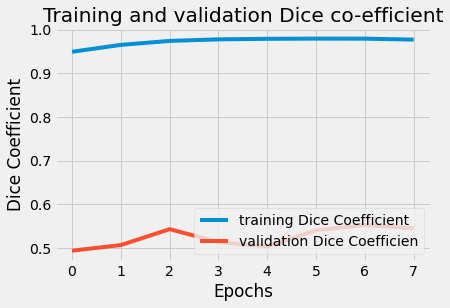

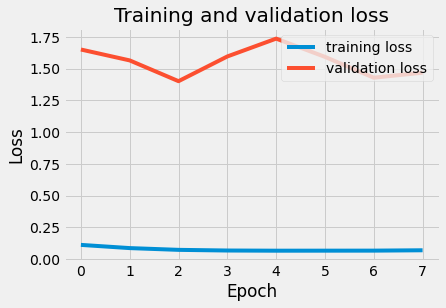

In [98]:
plot_dice_coefficient_loss(history)

**Insight**:<br>
    * The dice coefficient of Test data the model is **0.5766** where as training data its **0.97** Which is almost near 1. <br>
    *  The graph of Dice coeffient of Training and validation shows clear overfitting. Its performing better in Training data rather than test data<br>
    *  The dice-coefficient and Loss are almost constant over epochs its not showing much change for change in epochs <br>
 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image. [2 Marks]


### Predict the entire test data which are 9 in number

In [44]:
y_pred = model.predict(X_test, verbose = 1)

1/1 [==============================] - 3s 3s/step


In [99]:
X_test.shape

(9, 224, 224, 3)

### To access the image in index 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


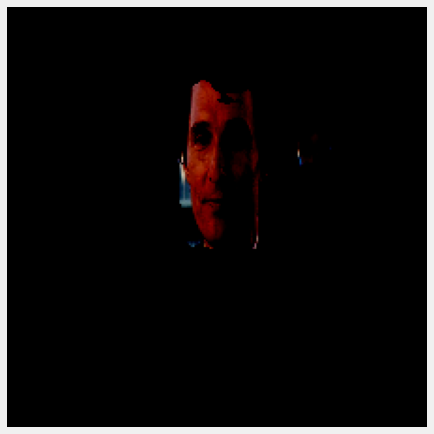

In [57]:
# To access the image in index 3
n = 3
image = cv2.resize(X_test[n], dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
pred_mask = cv2.resize(1.0*(y_pred[n] > 0.1), (IMAGE_WIDTH, IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]
out_image = image2

fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(out_image)

### Predicted Mask

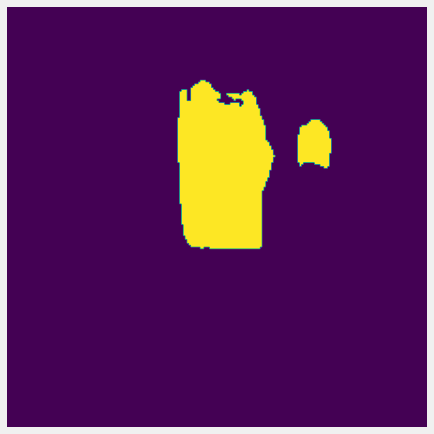

In [58]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(pred_mask, alpha = 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


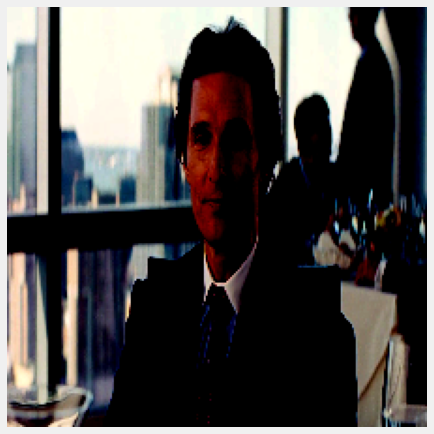

In [59]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(X_test[n])
plt.savefig('image.jpg', bbox_inches = 'tight', pad_inches = 0)

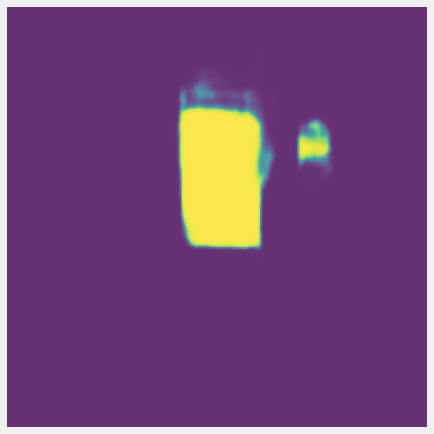

In [60]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(y_pred[n], alpha = 0.8)
plt.savefig('mask.jpg', bbox_inches = 'tight', pad_inches = 0)

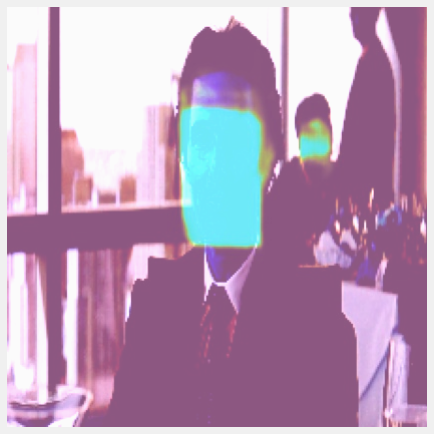

In [101]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
img = cv2.imread('image.jpg', 1)
mask = cv2.imread('mask.jpg', 1)
img = cv2.add(img, mask)
plt.imshow(img, alpha = 0.8)

**Conclusion**

The objective of the Project is to find the face detection model. The given data set has the numpy array of images having the face images and its mask coordinates of the Faces.
The model is built with Mobile Net for pretraining and appropriate upsamping is been added to imitate the U-Net architecture.

* Can able to create a model which is having 0.97 dice coefficient for Training data and 0.57 for Testdata
* The created model able to detect the faces pretty much well.

  ## PART B - 10 Marks

**DOMAIN**: Entertainment <br>

**CONTEXT**:Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene. <br>
The data labelling is already done. 

• **DATA DESCRIPTION**:The dataset comprises of face images <br>

**• PROJECT OBJECTIVE:** : To create an image dataset to be used by AI team build an image classifier data. Profile images of people are given.

### Steps and tasks: [ Total Score: 10 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. Read/import images from folder ‘training_images’. [2 Marks]

In [78]:
## Extract the file from zip file
import zipfile
zip_reference_train = zipfile.ZipFile('training_images-20211126T092819Z-001.zip', 'r')
## Extract to new folder called unzipped
zip_reference_train.extractall('training_unzipped') # unzip directory
zip_reference_train.close()

In [511]:
main_dir = 'training_unzipped'
train_dir = main_dir +'/training_images'
print(train_dir)

training_unzipped/training_images


In [107]:
import os

In [108]:
os.getcwd()

'C:\\Users\\HP\\Python\\ComputerVision_2'

In [512]:
classes=os.listdir(train_dir)

In [513]:
print(len(classes))

1091


**Observation** : There are 1091 images found in the given directory

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images. [3 Marks]

Hint: You can use ’haarcascade_frontalface_default.xml’ from internet to detect faces which is available open source.

**Haar Cascade Classifiers :** Haar Cascade classifier is an effective object detection approach which was proposed by Paul Viola and Michael Jones in their paper, “Rapid Object Detection using a Boosted Cascade of Simple Features” in 2001.

This is basically a machine learning based approach where a cascade function is trained from a lot of images both positive and negative. Based on the training it is then used to detect the objects in the other images.

So how this works is they are huge individual .xml files with a lot of feature sets and each xml corresponds to a very specific type of use case. [Reference link given below]

For the given problem the "haarcascade_frontalface_default.xml" is used for detecting the frontal face images.

In [122]:
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

Notes: haarcascade_frontalface_default.xml file is downloaded from github and stored into local location. That file is stored to local system as face_cascade

### Understanding the images by viewing a random image

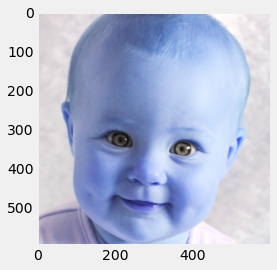

In [203]:
# Reading the image
test_img = cv2.imread(train_dir+'/'+'real_00089.jpg')
plt.grid(False)
plt.imshow(test_img)

In [137]:
faces=[]

### Converting the data to gray Scale for using the Haarcascade

The images are usually BGR (Blue, Green and Red channel). Its computationally more intensive. Converting to Gray scale as it has one channel, black and white

In [138]:
   # , img = cap.read()

gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

### viewing the Grayed Image

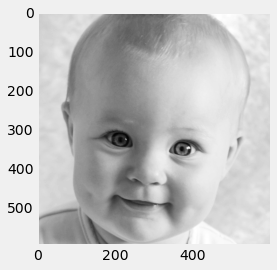

In [129]:
plt.grid(False)
plt.imshow(gray,cmap=plt.get_cmap('gray'))

In [139]:
faces

array([[102, 185, 405, 405]])

In [150]:
if faces is ():
    print("No faces found")
for (x,y,w,h) in faces:
    cv2.rectangle(test_img, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', test_img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

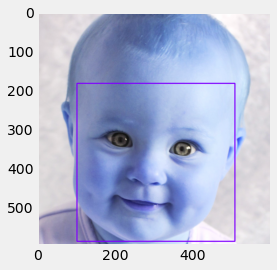

In [151]:
plt.grid(False)
plt.imshow(test_img)

**Observations:**

The above code displays the image with Rectangle detecting the face in it.

### Sample image which the classifier could not detect the face in it


In [ ]:
img = cv2.imread(train_dir+'/'+'real_00005.jpg')

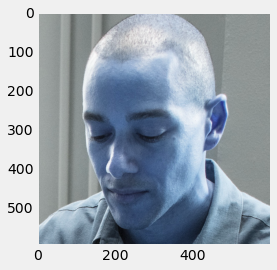

In [152]:
plt.grid(False)
plt.imshow(img)

In [154]:

# Importing OpenCV package
import cv2
  
# Reading the image

  
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 5)

print(faces_rect)
  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  
cv2.imshow('Detected faces', img)
  
cv2.waitKey(0)

()


-1

In [172]:
faces=[]

In [173]:

# Importing OpenCV package
import cv2
  
# Reading the image
img = cv2.imread(train_dir+'/'+'real_00012.jpg')
  
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 2)

print(faces_rect)

[[113 188 375 375]]


In [174]:
if faces_rect is ():
    print("No faces found")
for (x,y,w,h) in faces_rect:
    cv2.rectangle(img, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

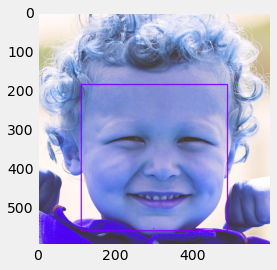

In [171]:
plt.grid(False)
plt.imshow(img)

### Loop for detecting faces in all the images

#### Trail to check first 3 images

In [179]:
x=0
for images in os.listdir(train_dir):
    if(x<3):
        print(x)
        print(images)
        
        # Reading the image
        img = cv2.imread(train_dir+'/'+images)
  
        # Converting image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
        # Loading the required haar-cascade xml classifier file
        haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
  
        # Applying the face detection method on the grayscale image
        faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 5)

        print(faces_rect)
        
        print(faces_rect[0][0],faces_rect[0][1])
        print('no of images=',len(faces_rect))
        
        x=x+1
  
    
       
           
    

0
real_00001.jpg
[[146 140 428 428]]
146 140
no of images= 1
1
real_00002.jpg
[[ 80 140 436 436]]
80 140
no of images= 1
2
real_00003.jpg
[[ 33 121 362 362]]
33 121
no of images= 1


### Looping through entire data set and detect the faces

In [182]:
lst = []
for images in os.listdir(train_dir): ## Loop to go through all the imagess
          
            
        # Reading the image
        img = cv2.imread(train_dir+'/'+images)
  
        # Converting image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
        # Loading the required haar-cascade xml classifier file
        haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
  
        # Applying the face detection method on the grayscale image
        faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 5)

        #lst.append([faces_rect[0][0], faces_rect[0][1],faces_rect[0][2],faces_rect[0][3],len(faces_rect),images])
        
        
        

**Comments** : The above code would loop through the entire data set and detect the faces

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. From the same loop above, extract metadata of the faces and write into a DataFrame. [3 Marks]

In [515]:
x=0

lst = []

### Creating Columns for Dataframe
cols = [ 'x','y','w','h','Total Faces', 'image Name']
faces_count=0
no_faces_count=0
for images in os.listdir(train_dir):
    
        #print(x)
        #print(images)
        
        # Reading the image
        img = cv2.imread(train_dir+'/'+images)
  
        # Converting image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
        # Loading the required haar-cascade xml classifier file
        haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
  
        # Applying the face detection method on the grayscale image
        faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 5)

        #print(faces_rect)
        if(len(faces_rect)>0):
            lst.append([faces_rect[0][0], faces_rect[0][1],faces_rect[0][2],faces_rect[0][3],len(faces_rect),images])
            faces_count=faces_count+1
        else:
            lst.append([0, 0,0,0,len(faces_rect),images])
            no_faces_count=no_faces_count+1
            #print(images, len(faces_rect))
        
        
print("No of images in which faces are identified",faces_count)  


No of images in which faces are identified 907


In [516]:
print("No of images in which faces are not identified",no_faces_count)   
face_detect_df = pd.DataFrame(lst, columns=cols)
print(face_detect_df.shape)


No of images in which faces are not identified 184
(1091, 6)


### viewing the images for which face are not detected

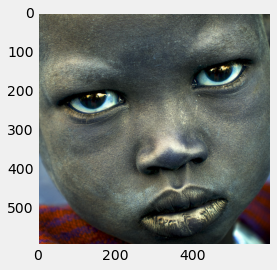

In [202]:
# Reading the image
img = cv2.imread(train_dir+'/'+'real_00951.jpg')
plt.grid(False)
plt.imshow(img)

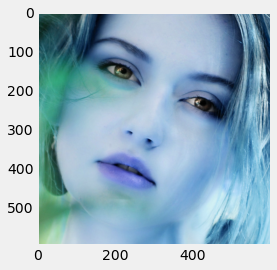

In [198]:
# Reading the image
img = cv2.imread(train_dir+'/'+'real_00607.jpg')
plt.grid(False)
plt.imshow(img)

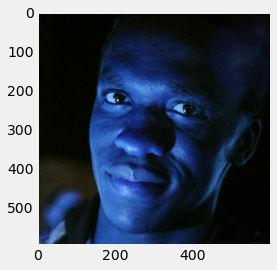

In [201]:
# Reading the image
img = cv2.imread(train_dir+'/'+'real_00692.jpg')
plt.grid(False)
plt.imshow(img)

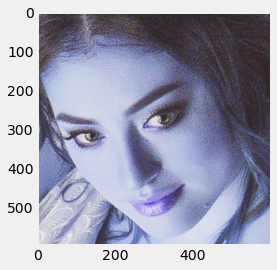

In [206]:
# Reading the image
img = cv2.imread(train_dir+'/'+'real_00970.jpg')
plt.grid(False)
plt.imshow(img)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4. Save the output Dataframe in .csv format. [2 Marks]

In [517]:
face_detect_df.shape

(1091, 6)

In [518]:
face_detect_df.head()

x    y    w    h  Total Faces      image Name
0  146  140  428  428            1  real_00001.jpg
1   80  140  436  436            1  real_00002.jpg
2   33  121  362  362            1  real_00003.jpg
3  134  173  356  356            1  real_00004.jpg
4    0    0    0    0            0  real_00005.jpg

In [521]:
face_detect_df.tail()

x    y    w    h  Total Faces      image Name
1086  93  167  402  402            1  real_01077.jpg
1087  65   76  468  468            1  real_01078.jpg
1088  69   67  475  475            1  real_01079.jpg
1089  51   87  447  447            1  real_01080.jpg
1090   0    0    0    0            0  real_01081.jpg

In [520]:
face_detect_df.to_csv("Face_detection_output_haarcascade_frontalface.csv", encoding='utf-8', index=True)

#### The Data frame successsfully saved into csv file which can be further used by AI team to build classifier.

**Comments:**
    The face detected co-ordinates are saved into the csv file

**Conclusion**:<br>
* The objective of the project is to detect the faces from the given images using haarcascade frontal face classifier and save the face co-ordinates to a csv file.<br>
* The task is achieved, changing the no of neighbours to 5 helped detect only one face from the given images.<br>
* haarcascade frontalface classifier is effective object detection approach, hence we can able to detect faces for 907 images out of 1091 images. <br>
* For 184 images the model cannot identify the faces
* when we observed the images which the classifier could not classify seems to be images, it happens to be the faces are not clear like eyes not open, seeing different direction, dark background etc

References:
https://towardsdatascience.com/computer-vision-detecting-objects-using-haar-cascade-classifier-4585472829a9


<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;">PART C - 30 Marks

* **DOMAIN:** Face Recognition <br>
* **CONTEXT:** Company X intends to build a face identification model to recognise human faces.<br>
* **DATA DESCRIPTION:** The dataset comprises of images and its mask where there is a human face.<br>
* **PROJECT OBJECTIVE:** Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library. Some data samples:<br>

 <img src="partc_image.png">

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.Unzip, read and Load data(‘PINS.zip’) into session. [2 Marks]

In [225]:
## Extract the file from zip file
import zipfile

In [226]:
try:
    zip_reference_pins = zipfile.ZipFile('PINS.zip', 'r')
    ## Extract to new folder called unzipped
    zip_reference_pins.extractall('pins_unzipped') # unzip directory
    zip_reference_pins.close()
except FileNotFoundError as e:
    print(e.errno,e.strerror,e.with_traceback)
    print(e.args)
    print(e)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 2. Write function to create metadata of the image. [4 Marks]

### Function to identify the metadata

This function accepts the base path, the identity name/ directory name and the individual file name as input and returns the complete path

In [392]:
class IdentityMetadata():
    def __init__(self, base, name, file):# Constructor for the class 
        self.base = base ## base path name
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):##a special method used to represent a class's objects as a string.
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 3. Write a loop to iterate through each and every image and create metadata for all the images. [4 Marks]

### Function to Load the metadata from the given path

**Note**: This method loops through all the folders in the zipped location and creates the individual paths of the images in an array

In [422]:
def load_metadata(path,image_names):
    x=1
    metadata = []
    for i in os.listdir(path):
        #print(i)
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
                image_names.append(f)
                if(x==1):
                    print(f)
                    print(metadata)
                    x=2
    return np.array(metadata)


#### Location of Unzipped file

In [394]:
import os
source_dir='pins_unzipped/PINS/'

In [395]:
len(os.listdir(source_dir))

100

**Comments**: The number of Directories in extracted zip file is 100

In [423]:
image_names=[]
# metadata = load_metadata('images')
metadata = load_metadata(source_dir,image_names)

Aaron Paul0_262.jpg
[pins_unzipped/PINS/pins_Aaron Paul\Aaron Paul0_262.jpg]


In [424]:
image_names[0]

'Aaron Paul0_262.jpg'

In [426]:
len(image_names)


10770

In [397]:

print('metadata shape :', metadata.shape)

metadata shape : (10770,)


**Comments**: This data set contains totally 10770 records of data of all 100 celebrities and meta data is created for the dataset.

In [398]:
metadata[1500]

pins_unzipped/PINS/pins_bill gates\bill gates41.jpg

In [399]:
type(metadata[1500]), metadata[1500].image_path()

(__main__.IdentityMetadata,
 'pins_unzipped/PINS/pins_bill gates\\bill gates41.jpg')

In [509]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [510]:
load_image('pins_unzipped/PINS/pins_bill gates\\bill gates41.jpg')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [508]:

print('metadata shape :', metadata.shape)

metadata shape : (10770,)


**Comments**: This data set contains totally 10770 records of data of all 100 celebrities and meta data is created for the dataset.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 4. Generate Embeddings vectors on the each face in the dataset. [4 Marks]


Hint: Use ‘vgg_face_weights.h5

In [404]:
### VGG face model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [405]:
model = vgg_face()

model.load_weights('vgg_face_weights.h5')

In [406]:
model.layers[0], model.layers[-2]

(<keras.layers.convolutional.ZeroPadding2D at 0x1fd5091d910>,
 <keras.layers.core.flatten.Flatten at 0x1fd5a651c40>)

In [407]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [408]:
type(vgg_face_descriptor)

keras.engine.functional.Functional

In [409]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_13_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten_1')>])

In [410]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [411]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(0.031703044, numpy.ndarray, numpy.float32)

In [412]:
embedding_vector[2], embedding_vector[98], embedding_vector[-2]

(-0.012434018, -0.008693828, 0.0021908146)

In [413]:
total_images = len(metadata)

print('total_images :', total_images)

total_images : 10770


In [414]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

In [416]:
print('embeddings shape :', embeddings.shape)

embeddings shape : (10770, 2622)


In [417]:
embeddings[0], embeddings[988], embeddings[988].shape

(array([ 0.03170304, -0.0150513 , -0.01243402, ...,  0.00043139,
         0.00219081, -0.00908097]),
 array([ 0.00793027,  0.00865317, -0.00304816, ..., -0.01746991,
         0.02693006,  0.00946763]),
 (2622,))

In [418]:
embeddings[8000]

array([-0.00379806,  0.00199546, -0.00214994, ..., -0.02244972,
       -0.00273736, -0.00215481])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 5. Build distance metrics for identifying the distance between two similar and dissimilar images. [4 Marks]

#### calculate distance between two pairs of Images

In [419]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Show images and find distance between pairs of Images


In [427]:
def show_pair(idx1, idx2):
    
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.grid(False)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.grid(False)
    plt.imshow(load_image(metadata[idx2].image_path())); 

### Distance between Similar images

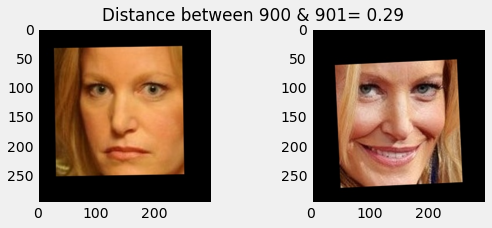

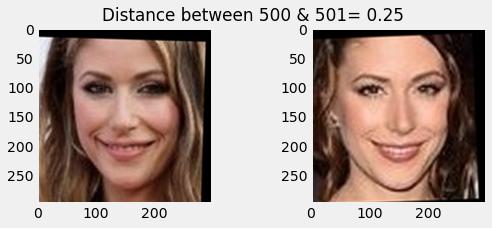

In [428]:

show_pair(900, 901)
show_pair(500, 501)

#### Distance between Dissimilar images

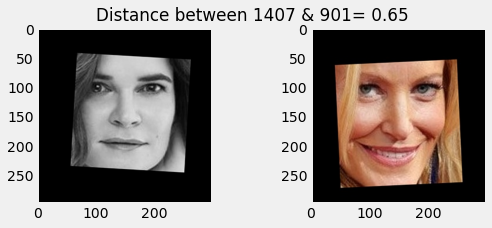

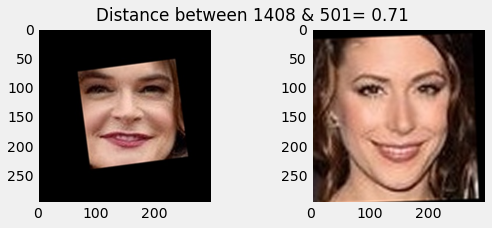

In [429]:
show_pair(1407, 901)
show_pair(1408, 501)

#### Comments<br>
Distance between the similar images are less and when dissimilar images its high

### Create Test and train data

In [430]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]

#test labels
y_test = targets[test_idx]

In [431]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (9573,2622)
y_train shape : (9573,)
X_test shape : (1197,2622)
y_test shape : (1197,)


In [432]:
y_test[0], y_train[988]

('pins_Aaron Paul', 'pins_barbara palvin face')

In [433]:
len(np.unique(y_test)), len(np.unique(y_train))

(100, 100)

## Encode labels

In [434]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [435]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman'
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_R

In [436]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [ 0  0  0 ... 99 99 99]
y_test_encoded :  [ 0  0  0 ... 99 99 99]


In [437]:
## Standarizze with Standard Scalar

In [438]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [439]:
X_test_std = scaler.transform(X_test)

In [440]:

print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (9573,2622)
y_train_encoded shape : (9573,)
X_test_std shape : (1197,2622)
y_test_encoded shape : (1197,)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">6. Use PCA for dimensionality reduction. [2 Marks]

### Dimensionality Reduction with PCA

In [441]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 7. Build an SVM classifier in order to map each image to its right person. [4 Marks]

#### Model building and validation

In [443]:
from sklearn.svm import SVC

clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [444]:
y_predict = clf.predict(X_test_pca)

In [445]:
y_predict_encoded = le.inverse_transform(y_predict)

In [446]:
print('y_predict_encoded : ',y_predict_encoded)

y_predict_encoded :  ['pins_Aaron Paul' 'pins_Aaron Paul' 'pins_Aaron Paul' ... 'pins_zendaya'
 'pins_zendaya' 'pins_zendaya']


In [447]:
print('y_predict shape : ', y_predict.shape)
print('y_test_encoded shape : ', y_test_encoded.shape)

y_predict shape :  (1197,)
y_test_encoded shape :  (1197,)


In [448]:
y_test_encoded[32:49]

array([ 1,  1,  1,  1,  1,  1, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64])

In [449]:
# Find the classification accuracy
accuracy_score(y_test_encoded, y_predict)

0.949874686716792

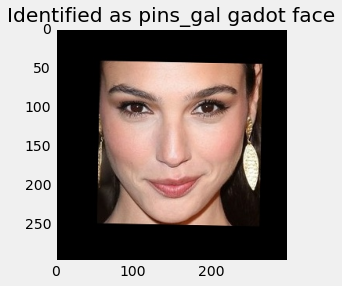

In [450]:
example_idx = 501

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]
plt.grid(False)
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

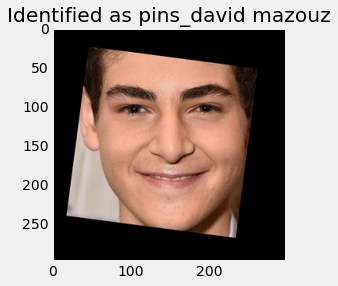

In [451]:
example_idx = 350

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]
plt.grid(False)
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">8. Import and display the the test images. [2 Marks]
    

Hint: ‘Benedict Cumberbatch9.jpg’ and ‘Dwayne Johnson4.jpg’ are the test images

In [482]:
test_img1='Benedict Cumberbatch9.jpg'
test_img2='Dwayne Johnson4.jpg'

In [488]:
def displayImage(image_name):
    img = cv2.imread(image_name)
    plt.grid(False)
    plt.imshow(img)
    plt.title(image_name)
    

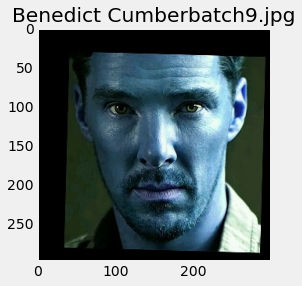

In [489]:
displayImage(test_img1)

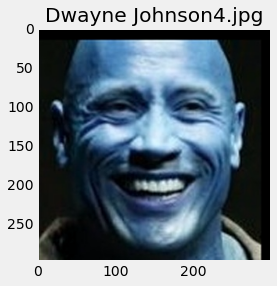

In [490]:
displayImage(test_img2)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">9. Use the trained SVM model to predict the face on both test images. [4 Marks]

### Function to create the embedding

In [503]:
def getEmbedding(image):   
    img = load_image(image)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    return embedding_vector
 

### Display image with prediction

In [504]:
def displayPrediction(image_name,title):
    img = cv2.imread(image_name)
    plt.grid(False)
    plt.imshow(img)
    plt.title(title)

In [505]:
def predictImage(image):
    embedding=getEmbedding(image)
    test_std=scaler.transform([embedding])
    test_pca =pca.transform(test_std)
    encoded_test = clf.predict(test_pca)
    predicted=le.inverse_transform(encoded_test)[0]
    displayPrediction(image,predicted)
    return predicted

Predicted face is  pins_Benedict Cumberbatch


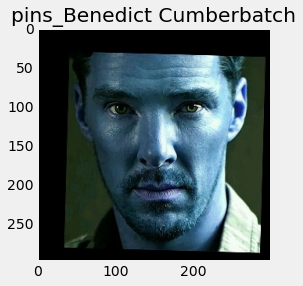

In [506]:
predict_1=predictImage(test_img1)
print("Predicted face is ",predict_1)

Predicted face is  pins_Dwayne Johnson


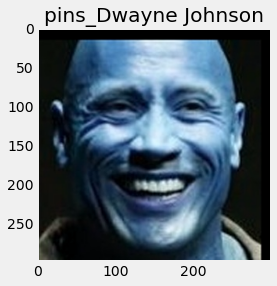

In [507]:
predict_2=predictImage(test_img2)
print("Predicted face is ",predict_2)

**Conclusion**:<br>
* The face recognition project helps to recognise the popular 100 faces. 
* The SVM model is built to recognize the faces is having accuracy of 94.98% accuracy.
* The model can predict the images correctly by passing the images. For predicting the images, embedding is created and all the preprocessing like standardization, applying PCA done before into the model.
    